In [299]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [300]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
#%matplotlib inline

In [414]:
def init_data (min, max, n , m , b): #makes the data points
    x = np.random.rand(n, 1) * (max-min) + min
    y = m * x + b
    y = y + np.random.normal(scale=3, size=y.shape)

    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)

    return x , y

def prepare_x (x, k): #modifies x based on k
    s = np.zeros((len(x),1))
    if k > 0 and x.shape[1] == 1:
        for i in range(2, k+1):
            s = np.hstack((s, x ** i))

        s = np.delete(s,0, axis = 1)
        return np.hstack((x ,s))
    elif k < 1:
        print('k should be greater than 0')
    elif x.shape[1] > 1:
        print('x is not is the correct shape')
        
def prepare_X_line (x, k): #modifies x_line base on k
    x_line = np.arange(x.min() - 5 , x.max() + 5 , 0.1).reshape(-1,1)
    s = np.zeros((len(x_line),1))
    for i in range(2, k+1):
        s = np.hstack((s, x_line ** i))

    s = np.delete(s,0, axis = 1)
    return np.hstack((x_line ,s))

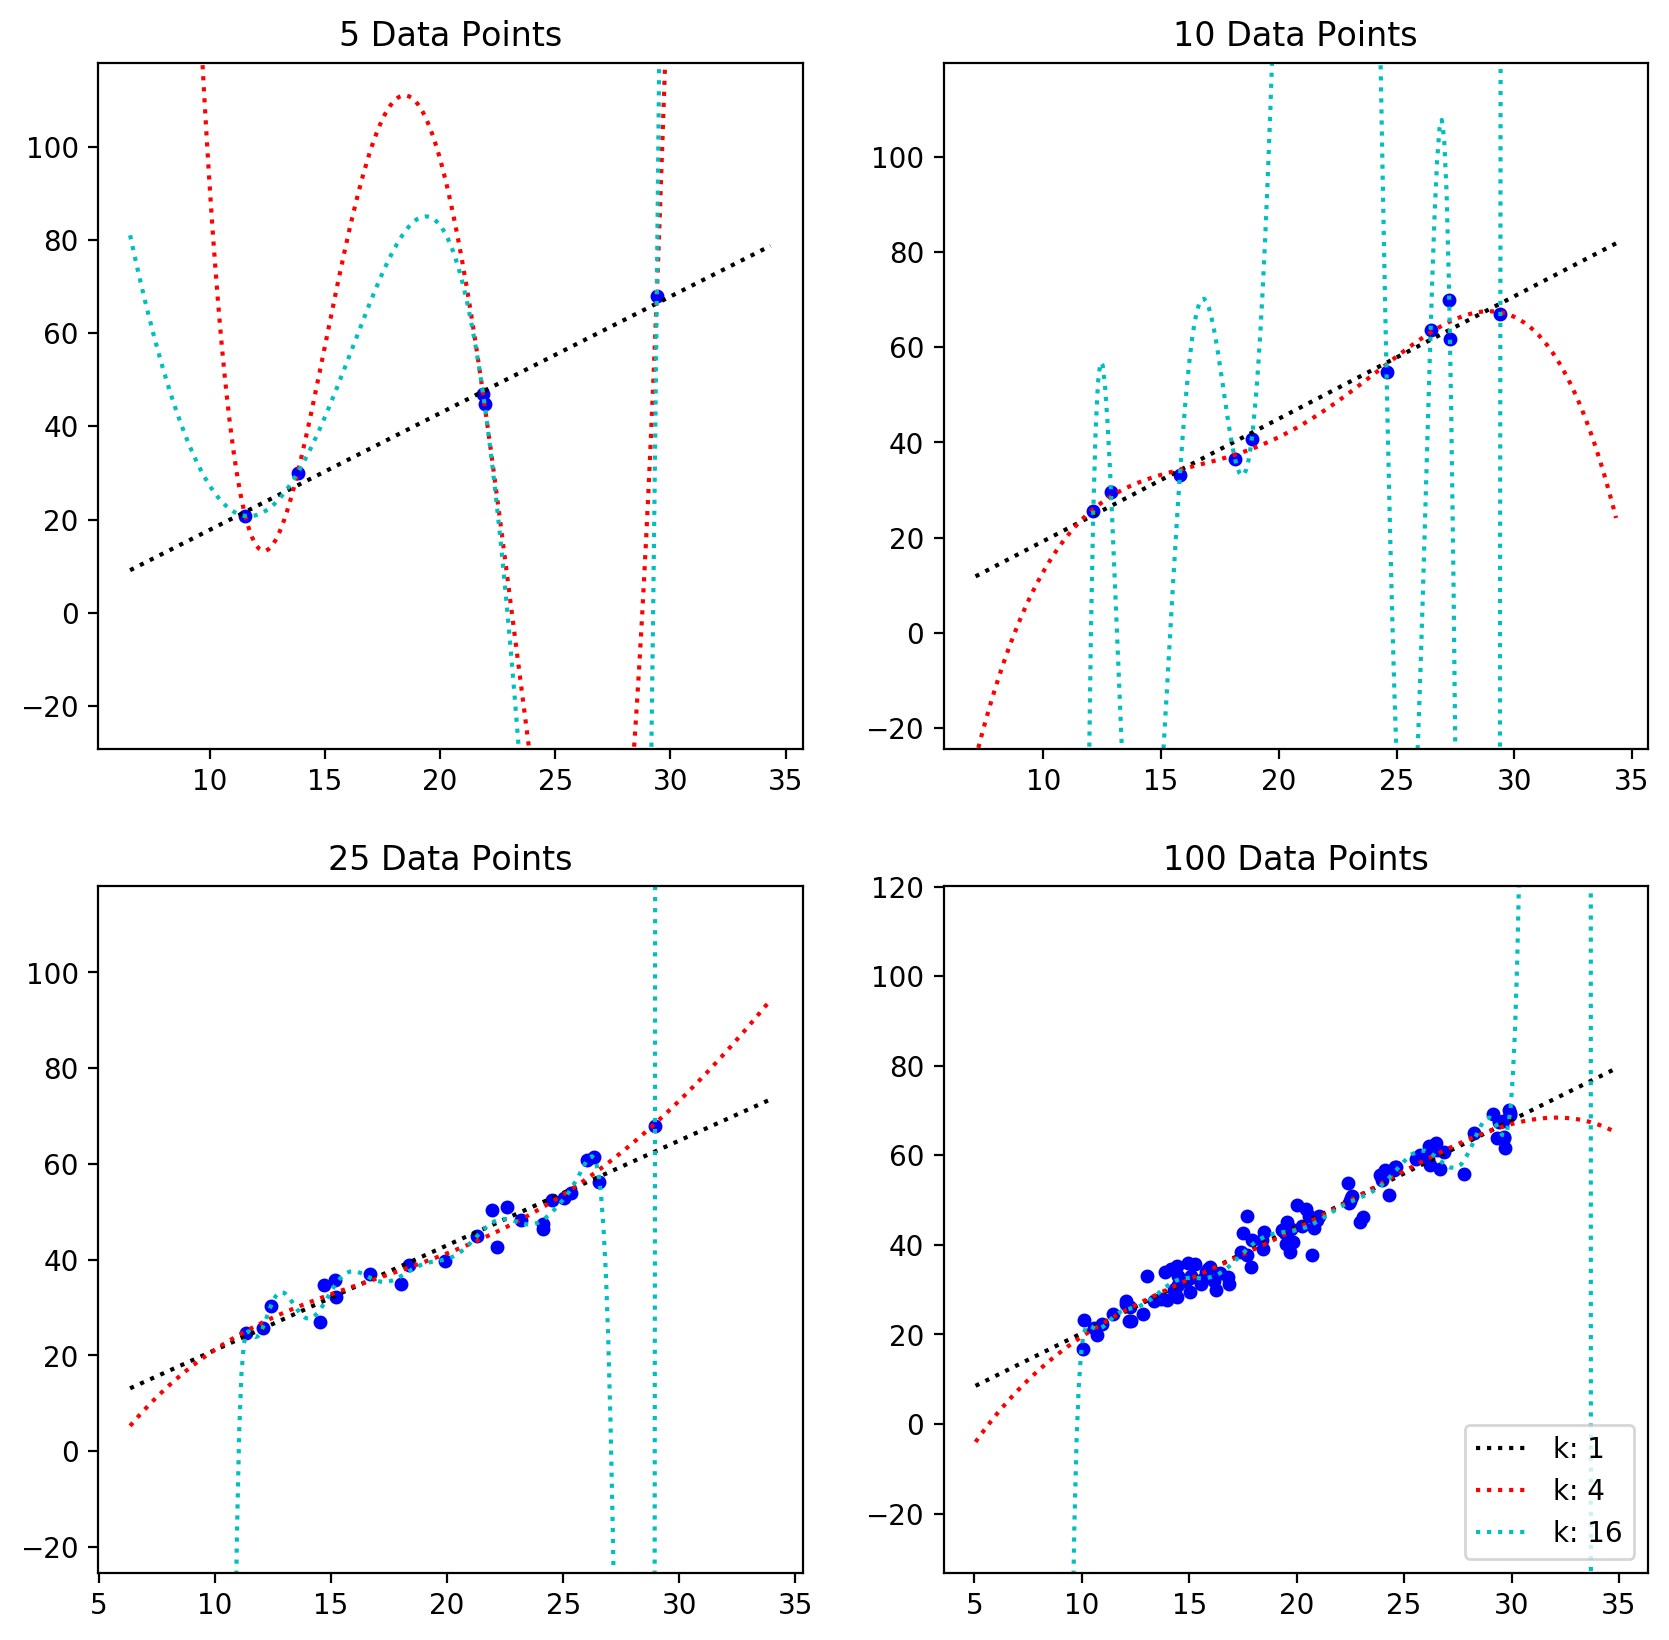

In [415]:
no_of_points = [5, 10, 25, 100]
K = [1, 4 , 16]

plot_place = 1
plt.subplots(nrows= 2, ncols = 2, figsize=(10, 10), dpi = 200)
lr_model = LinearRegression(normalize=True)

for n in no_of_points:
    plt.subplot('22{}'.format(plot_place))
    x, y = init_data(10, 30, n, 2.358, -3.121)
    plt.plot(x, y, 'bo', ms =4)
    plt.title(label = '{} Data Points'.format(x.shape[0]))

    i=0
    line_styles = ['k:' , 'r:' , 'c:']
    for k in K:
        X = prepare_x(x,k)
        X_line = prepare_X_line (x, k)
        lr_model.fit(X, y)
        y_line = lr_model.predict(X_line)
        plt.plot(X_line[:,0], y_line, line_styles[i], label = 'k: {}'.format(k))
        i+=1
    plt.ylim(y.min() - 50, y.max() + 50) 
    plt.subplots_adjust(hspace=0.2)
    plot_place += 1
plt.legend(loc = 'lower right')

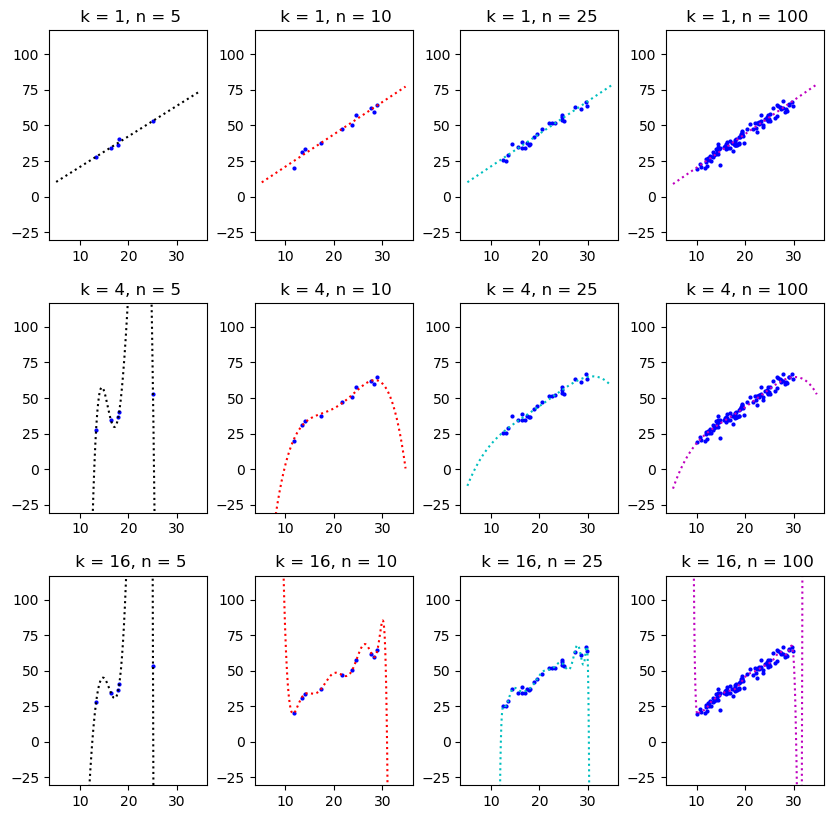

In [416]:
#section 2
K = [1, 4 , 16]
no_of_points = [5, 10, 25, 100]

plt.subplots(nrows= 3, ncols = 4, figsize=(10, 10), dpi = 100)
lr_model = LinearRegression(normalize=True)

#initiate data points
x, y = init_data(10, 30, 100, 2.358, -3.121)

#choose random data points for each n and save in dictionaries
x_dict = {}
y_dict = {}
for n in no_of_points:
    x_indices = np.random.choice(x.shape[0], size=n, replace=False)
    x_random_choice = x[x_indices,:]
    y_random_choice = y[x_indices,:]
    x_dict[n] = x_random_choice
    y_dict[n] = y_random_choice


line_styles = ['k:' , 'r:' , 'c:' , 'm:']
j=0    
for k in K:
    i=0
    for n in no_of_points:
        
        #load the data points from dicts
        x_random_choice = x_dict[n]
        y_random_choice = y_dict[n]
        
        #prepare x & train model
        X = prepare_x(x_random_choice,k)
        X_line = prepare_X_line (x, k)
        lr_model.fit(X, y_random_choice)
        y_line = lr_model.predict(X_line)
        
        #plot data points
        plt.subplot2grid((3,4), (j,i))
        plt.plot(x_random_choice, y_random_choice, 'bo', ms =2)
        plt.title(label = ' k = {}, n = {}'.format(k, x_random_choice.shape[0]))
        
        #plot predict
        plt.plot(X_line[:,0], y_line, line_styles[i], label = 'Data Point: {}'.format(x_random_choice.shape[0]))
        plt.ylim(y.min() - 50, y.max() + 50) 
        plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
        i+=1
    j+=1
#plt.legend(loc = 'lower right')

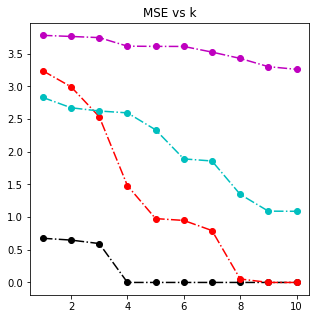

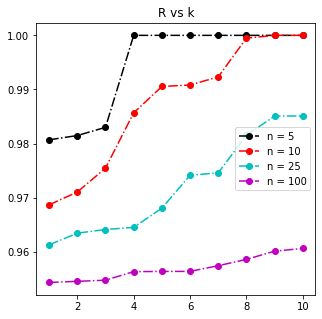

In [417]:
#section 3
K = range(1, 11)
no_of_points = [5, 10, 25, 100]

i=0
line_styles = ['ko-.' , 'ro-.' , 'co-.' , 'mo-.']
for n in no_of_points:
    MSE_list = []
    R_list = []
    
    for k in K:
        x_random_choice = x_dict[n]
        y_random_choice = y_dict[n] 
        
        X = prepare_x(x_random_choice,k)
        X_line = prepare_X_line (x, k)
        
        lr_model.fit(X, y_random_choice)
        y_line = lr_model.predict(X_line)
        
        h = lr_model.predict(X)
        MSE = np.mean((y_random_choice - h) ** 2) / 2
        R = 1- (2 * MSE/y_random_choice.var())
        MSE_list.append(MSE)
        R_list.append(R)
        
    plt.figure(num = 1, figsize = (5,5))
    plt.plot(K, MSE_list, line_styles[i], label = 'n = {}'.format(n))
    plt.title(label = 'MSE vs k')
    
    plt.figure(num = 2, figsize = (5,5))
    plt.plot(K, R_list, line_styles[i], label = 'n = {}'.format(n))
    plt.title(label = 'R vs k')
    
    i+=1
plt.legend(loc = 'center right')

پاسخ به سوالات:
 1) به نظر شما برای دادگان خطی، استفاده از رگرسیون های غیر خطی نیز می تواند دقت کافی را کسب کند؟
 
 خیر، همانطور که در نمودارهای بخش 2 مشخص است حتی اگر رگرسیون غیر خطی بتواند برای فضای دامنه پیش بینی نسبتا درستی داشته باشد، برای فضای خارج از دامنه دادگان خطای بسیار زیادی خواهد داشت 
 
 2) اگر هیچ دانشی در مورد دادگان خود نداشته باشیم، چطور می توانیم توان چندجمله ای لازم را بیابیم؟
 
 باید همیشه بخشی از دادگان را جدا کنیم و وارد آموزش نکنیم. همچنین باید حداقل بخشی از این داده های جدا شده، خارج از دامنه دادگان آموزشی باشند. پس از اینکه آموزش مدل انجام شد با استفاده از داده های جدا شده میسنجیم که آیا مدل درست پیش بینی می کند یا خیر
 
 3) آیا کاهش خطای مدل بر روی مجموعه دادگان اولیه، همواره مطلوب است؟ آیا ممکن است مدلی که در دادگان آموزشی خطای کمتری داشته، در عمل بدتر عمل کند؟
 
 خیر، همانطور که در در نمودارهای بخش 3 مشاهده می شود، با افزایش تعداد چند جمله ای ها خطای مدل بر روی مجموعه دادگان اولیه کاهش یافته است اما توانایی مدل در پیش بینی مقادیر جدید کاهش یافته و بدتر عمل می کند. در واقع در اینجا مدل خطی بیشترین خطا را دارد ولی می دانیم که برای پیش بینی مسئله ما بهتر عمل خواهد کرد
 
 4) چطور میتوانیم مشکل ایجاد شده برای مدلهای چند جمله ای با توان بالا را حل کنیم؟
 
 با افزایش تعداد دادگان مورد استفاده در آموزش مدل، حداقل می توان امیدوار بود که مدل های چند جمله ای در دامنه دادگان آموزشی عملکرد بهتری از قبل داشته باشند.